In [2]:
using PyPlot

In [3]:
# PyPlot does not works so no plots in this code 
using Ensemble
using CARMA
using PyCall

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] @vectorize_2arg(::ANY, ::ANY) at ./deprecated.jl:339
 [3] include_from_node1(::String) at ./loading.jl:576
 [4] include(::String) at ./sysimg.jl:14
 [5] include_from_node1(::String) at ./loading.jl:576
 [6] eval(::Module, ::Any) at ./boot.jl:235
 [7] _require(::Symbol) at ./loading.jl:490
 [8] require(::Symbol) at ./loading.jl:405
 [9] include_string(::String, ::String) at ./loading.jl:522
 [10] include_string(::Module, ::String, ::String) at /Users/nevencaplar/.julia/v0.6/Compat/src/Compat.jl:71
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/nevencaplar/.julia/v0.6/IJulia/src/execute_request.jl:158
 [12] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/nevencaplar/.julia/v0.6/Compat/src/Compat.jl:385
 [13] eventloop(::ZMQ.Socket) at /Users/nevencaplar/.julia/v0.6/IJulia/src/eventloop.jl:8
 [14] (::IJulia.##14#17)() at ./task.jl:335
while loading /User

In [67]:
xb158i = readdlm("/Users/nevencaplar/Documents/Variability/Farr/CARMATutorial-master/Data/res7.dat",Float32)

80×3 Array{Float32,2}:
   0.669481   -7.297  0.053
   2.85483    -7.211  0.064
   5.69428    -7.57   0.037
   7.20911    -7.314  0.057
  10.9517     -7.542  0.048
  15.7919     -8.054  0.051
  17.0588     -8.0    0.071
  20.1465     -8.47   0.04 
  22.0264     -8.737  0.066
  27.5927     -8.923  0.055
  32.2649     -9.911  0.055
  37.8185     -9.774  0.044
  39.3265    -10.14   0.064
  41.9477    -10.255  0.053
  43.2641    -10.371  0.059
  43.4644    -10.371  0.056
  43.1971    -10.371  0.033
  43.097     -10.371  0.048
  43.412     -10.371  0.042
   ⋮                       
 553.702     -10.929  0.054
 558.381     -10.911  0.047
 560.788     -10.687  0.037
 560.798     -10.687  0.043
 560.143     -10.687  0.064
 561.601     -10.921  0.051
 566.157     -11.532  0.055
 572.045     -11.862  0.038
 574.445     -11.706  0.069
 577.719     -11.188  0.044
 578.011     -10.981  0.048
 584.526     -11.419  0.055
 585.676     -11.717  0.064
 587.406     -11.994  0.049
 592.306     -12.393  0.0

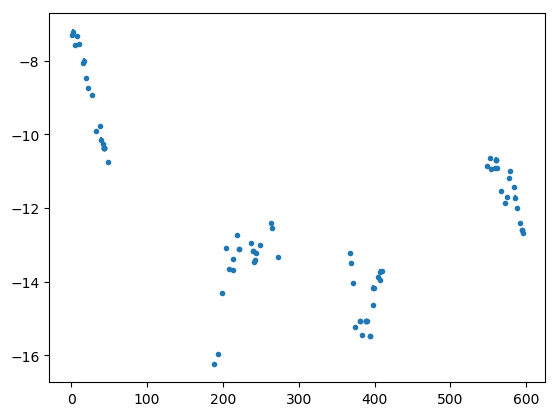

(PyObject <matplotlib.lines.Line2D object at 0x12adc11d0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x12adc1610>,))

In [68]:
errorbar(xb158i[:,1], xb158i[:,2], xb158i[:,3], fmt=".")

In [60]:
"""
function CARMAestimateFarr(data)
    p=2
    q=0
        
    # We construct the posterior object by giving it times, samples, and uncertainties.
    posterior = Kalman.CARMAKalmanPosterior(data[:,1], data[:,2], data[:,3], p, q)
    nlive = 1024
    print("Checkpoint 0")
    print(posterior)
    prior_pts = Kalman.init(posterior, nlive)
    print("Checkpoint 1")
    neststate = EnsembleNest.NestState(x -> Kalman.log_likelihood(posterior, x), x->Kalman.log_prior(posterior, x), prior_pts, 128)
    print("Checkpoint 2")
    @time EnsembleNest.run!(neststate,0.1)
    print("Checkpoint 3")
    postsamples32, lnlike32 = EnsembleNest.postsample(neststate)
    fmax = 1.0/(2*median(diff(data[:,1]))) # As if median dt were Nyquist
    df = 1.0/(data[end,1]-data[1,1]) # With spacing equal to 1/T
    fs = collect(df:df:fmax)
    psds = zeros(size(fs, 1), 1000)
    for i in 1:1000
        p = postsamples32[:, rand(1:size(postsamples32,2))] # Choose a random posterior sample
        psds[:,i] = Kalman.psd(posterior, p, fs)
    end
    
    pmin = zeros(size(fs, 1))
    pmax = zeros(size(fs, 1))
    pmed = zeros(size(fs, 1))
    for i in 1:size(fs, 1)
        pmin[i] = quantile(vec(psds[i,:]), 0.025)
        pmed[i] = median(vec(psds[i,:]))
        pmax[i] = quantile(vec(psds[i,:]), 0.975)
    end

    cd("/Users/nevencaplar/Documents/Variability/CARMA2017/Testing_Results_Julia/")
    for_output=cat(1,fs,pmin,pmed,pmax)
    writedlm(join(["test","_res_Farr.txt"]), for_output)
end
"""

CARMAestimateFarr (generic function with 1 method)

In [69]:
posterior = Kalman.CARMAKalmanPosterior(sort(xb158i[:,1]), xb158i[:,2], xb158i[:,3], 2, 0)

CARMA.Kalman.CARMAKalmanPosterior([0.669481, 2.85483, 5.69428, 7.20911, 10.9517, 15.7919, 17.0588, 20.1465, 22.0264, 27.5927  …  574.445, 577.719, 578.011, 584.526, 585.676, 587.406, 592.306, 594.058, 594.598, 595.198], [-7.297, -7.211, -7.57, -7.314, -7.542, -8.054, -8.0, -8.47, -8.737, -8.923  …  -11.706, -11.188, -10.981, -11.419, -11.717, -11.994, -12.393, -12.601, -12.601, -12.687], [0.053, 0.064, 0.037, 0.057, 0.048, 0.051, 0.071, 0.04, 0.066, 0.055  …  0.069, 0.044, 0.048, 0.055, 0.064, 0.049, 0.028, 0.04, 0.058, 0.048], 2, 0)

In [70]:
nlive = 1024
prior_pts = Kalman.init(posterior, nlive)

5×1024 Array{Float64,2}:
 -31.7675    -8.92469   0.929399  -15.6442    6.23201   …   3.695    -20.4464   -22.1682    -14.1883  
   0.646783   8.09803   3.23177    16.5666    0.294864     10.7044     1.49336    5.40781     0.296622
   4.87451    0.415252  3.35036     0.229404  0.290898      1.45335    2.19169    0.150392    1.57853 
  -0.843113   2.71816   4.20731    -1.40583   1.8759       -1.73222   -5.54243   -4.24164    -4.68413 
   8.25825   -3.30147   6.01812     7.69559   4.3432       -7.30641   -1.63502    2.51291    -8.6748  

In [71]:
neststate = EnsembleNest.NestState(x -> Kalman.log_likelihood(posterior, x), x->Kalman.log_prior(posterior, x), prior_pts, 128)

Ensemble.EnsembleNest.NestState(#9, #10, 128, 128.0, [-31.7675 -8.92469 … -22.1682 -14.1883; 0.646783 8.09803 … 5.40781 0.296622; … ; -0.843113 2.71816 … -4.24164 -4.68413; 8.25825 -3.30147 … 2.51291 -8.6748], [-1.14827, -1.21275, -2.3821, -1.33511, 2.45602, -4.51987, -1.61361, 0.132559, 0.527725, -2.84774  …  -1.89125, -0.432264, -1.57834, -2.54418, 1.78839, -0.269212, -2.74453, -1.18571, 0.206663, 0.758802], [-57434.5, -53.3816, -759.498, -296.965, -1.5309e5, -353.021, -37308.0, -89.0382, -6.72784e5, -6628.06  …  -30813.7, -12601.1, -101.862, -213.69, -74567.7, -24595.7, -41.9601, -49366.5, -6871.33, -2041.06], Array{Float64}(5,0), Float64[], Float64[], 0.0, -Inf)

In [72]:
@time EnsembleNest.run!(neststate, 0.1)

Retired point with ll = -7.472342184308668e6; accept = 0.2109375; next nmcmc = 128
Retired point with ll = -4.495020199747841e6; accept = 0.203125; next nmcmc = 128
Retired point with ll = -4.467851402229754e6; accept = 0.203125; next nmcmc = 128
Retired point with ll = -3.9141767353269607e6; accept = 0.1953125; next nmcmc = 128
Retired point with ll = -3.1363555304609844e6; accept = 0.21875; next nmcmc = 128
Retired point with ll = -2.650977088923456e6; accept = 0.265625; next nmcmc = 128
Retired point with ll = -2.631231974079795e6; accept = 0.2578125; next nmcmc = 128
Retired point with ll = -2.6073705988171417e6; accept = 0.265625; next nmcmc = 128
Retired point with ll = -2.102969787408167e6; accept = 0.203125; next nmcmc = 128
Retired point with ll = -1.8810915487799724e6; accept = 0.3203125; next nmcmc = 128
Retired point with ll = -1.8055899762024423e6; accept = 0.2890625; next nmcmc = 127
Retired point with ll = -1.7261507868747264e6; accept = 0.33070866141732286; next nmcmc =

Retired point with ll = -111044.35746455223; accept = 0.3387096774193548; next nmcmc = 124
Retired point with ll = -109195.22590377343; accept = 0.14516129032258066; next nmcmc = 124
Retired point with ll = -108803.93089028078; accept = 0.1774193548387097; next nmcmc = 124
Retired point with ll = -108580.57815542762; accept = 0.28225806451612906; next nmcmc = 124
Retired point with ll = -108243.40890274642; accept = 0.12096774193548387; next nmcmc = 124
Retired point with ll = -105433.1904159226; accept = 0.20967741935483872; next nmcmc = 124
Retired point with ll = -103620.61564192497; accept = 0.21774193548387097; next nmcmc = 124
Retired point with ll = -102970.0245738964; accept = 0.25806451612903225; next nmcmc = 124
Retired point with ll = -102835.25387110712; accept = 0.27419354838709675; next nmcmc = 124
Retired point with ll = -99593.65473831938; accept = 0.14516129032258066; next nmcmc = 124
Retired point with ll = -89584.19147739245; accept = 0.22580645161290322; next nmcmc 

Retired point with ll = -24595.69884678583; accept = 0.26666666666666666; next nmcmc = 120
Retired point with ll = -24561.387288191443; accept = 0.21666666666666667; next nmcmc = 120
Retired point with ll = -24403.22362677378; accept = 0.2; next nmcmc = 120
Retired point with ll = -24242.150192672012; accept = 0.175; next nmcmc = 120
Retired point with ll = -23882.2546143182; accept = 0.14166666666666666; next nmcmc = 120
Retired point with ll = -23354.885554686687; accept = 0.225; next nmcmc = 120
Retired point with ll = -23304.443104411446; accept = 0.09166666666666666; next nmcmc = 120
Retired point with ll = -23230.647834995372; accept = 0.08333333333333333; next nmcmc = 120
Retired point with ll = -23211.516988478226; accept = 0.225; next nmcmc = 120
Retired point with ll = -22870.04640760629; accept = 0.2833333333333333; next nmcmc = 120
Retired point with ll = -22808.534722489418; accept = 0.13333333333333333; next nmcmc = 120
Retired point with ll = -22749.87334384724; accept =

Retired point with ll = -9678.834501719042; accept = 0.2222222222222222; next nmcmc = 117
Retired point with ll = -9627.806147444597; accept = 0.21367521367521367; next nmcmc = 117
Retired point with ll = -9402.755206306936; accept = 0.2222222222222222; next nmcmc = 117
Retired point with ll = -9342.030470482357; accept = 0.23931623931623933; next nmcmc = 117
Retired point with ll = -9191.887091493245; accept = 0.1282051282051282; next nmcmc = 117
Retired point with ll = -9143.135465903884; accept = 0.26495726495726496; next nmcmc = 117
Retired point with ll = -9029.72619919667; accept = 0.24786324786324787; next nmcmc = 117
Retired point with ll = -9012.269933294681; accept = 0.3247863247863248; next nmcmc = 117
Retired point with ll = -8990.802435674126; accept = 0.10256410256410256; next nmcmc = 117
Retired point with ll = -8858.145620533503; accept = 0.1452991452991453; next nmcmc = 117
Retired point with ll = -8857.25042581357; accept = 0.15384615384615385; next nmcmc = 117
Retire

Retired point with ll = -4479.180045706259; accept = 0.2719298245614035; next nmcmc = 114
Retired point with ll = -4478.32510541908; accept = 0.24561403508771928; next nmcmc = 114
Retired point with ll = -4470.120973444012; accept = 0.16666666666666666; next nmcmc = 114
Retired point with ll = -4450.66797961499; accept = 0.16666666666666666; next nmcmc = 114
Retired point with ll = -4409.653360775934; accept = 0.19298245614035087; next nmcmc = 114
Retired point with ll = -4373.078067516141; accept = 0.3157894736842105; next nmcmc = 114
Retired point with ll = -4360.516193824234; accept = 0.2719298245614035; next nmcmc = 114
Retired point with ll = -4345.185691777015; accept = 0.40350877192982454; next nmcmc = 114
Retired point with ll = -4320.228173248153; accept = 0.11403508771929824; next nmcmc = 114
Retired point with ll = -4299.095006379007; accept = 0.13157894736842105; next nmcmc = 114
Retired point with ll = -4280.326476751785; accept = 0.30701754385964913; next nmcmc = 114
Reti

Retired point with ll = -2276.472204551817; accept = 0.35135135135135137; next nmcmc = 111
Retired point with ll = -2275.58301955783; accept = 0.10810810810810811; next nmcmc = 111
Retired point with ll = -2271.559679877255; accept = 0.16216216216216217; next nmcmc = 111
Retired point with ll = -2269.625438662727; accept = 0.24324324324324326; next nmcmc = 111
Retired point with ll = -2261.6482793561872; accept = 0.22522522522522523; next nmcmc = 111
Retired point with ll = -2243.905171354378; accept = 0.2072072072072072; next nmcmc = 111
Retired point with ll = -2224.041982322368; accept = 0.17117117117117117; next nmcmc = 111
Retired point with ll = -2214.476961489926; accept = 0.17117117117117117; next nmcmc = 111
Retired point with ll = -2170.7748054265944; accept = 0.3783783783783784; next nmcmc = 111
Retired point with ll = -2164.776048619492; accept = 0.2882882882882883; next nmcmc = 111
Retired point with ll = -2148.5858054062633; accept = 0.23423423423423423; next nmcmc = 111


Retired point with ll = -1288.8969867943774; accept = 0.23148148148148148; next nmcmc = 108
Retired point with ll = -1288.4984352747742; accept = 0.2222222222222222; next nmcmc = 108
Retired point with ll = -1287.46103715297; accept = 0.37037037037037035; next nmcmc = 108
Retired point with ll = -1282.1962251120053; accept = 0.1111111111111111; next nmcmc = 108
Retired point with ll = -1281.5669555105221; accept = 0.2222222222222222; next nmcmc = 108
Retired point with ll = -1281.2075214553388; accept = 0.19444444444444445; next nmcmc = 108
Retired point with ll = -1265.8935770311534; accept = 0.37962962962962965; next nmcmc = 108
Retired point with ll = -1260.8945927276254; accept = 0.18518518518518517; next nmcmc = 108
Retired point with ll = -1260.7411223728825; accept = 0.26851851851851855; next nmcmc = 108
Retired point with ll = -1259.5532198559422; accept = 0.12037037037037036; next nmcmc = 108
Retired point with ll = -1257.8576884418683; accept = 0.19444444444444445; next nmcmc

Retired point with ll = -794.6657073850629; accept = 0.3333333333333333; next nmcmc = 105
Retired point with ll = -792.2464103117788; accept = 0.21904761904761905; next nmcmc = 105
Retired point with ll = -788.942707103437; accept = 0.22857142857142856; next nmcmc = 105
Retired point with ll = -784.7119257122729; accept = 0.19047619047619047; next nmcmc = 105
Retired point with ll = -784.2768947555181; accept = 0.17142857142857143; next nmcmc = 105
Retired point with ll = -783.7794801095673; accept = 0.1619047619047619; next nmcmc = 105
Retired point with ll = -781.3536714962934; accept = 0.18095238095238095; next nmcmc = 105
Retired point with ll = -780.896377125517; accept = 0.14285714285714285; next nmcmc = 105
Retired point with ll = -779.2744694621487; accept = 0.24761904761904763; next nmcmc = 105
Retired point with ll = -764.6589872645906; accept = 0.2571428571428571; next nmcmc = 105
Retired point with ll = -764.5408821549601; accept = 0.3238095238095238; next nmcmc = 105
Retir

Retired point with ll = -506.4980669667184; accept = 0.2524271844660194; next nmcmc = 103
Retired point with ll = -504.6367684634366; accept = 0.4174757281553398; next nmcmc = 103
Retired point with ll = -504.4244950396311; accept = 0.18446601941747573; next nmcmc = 103
Retired point with ll = -503.703051545751; accept = 0.21359223300970873; next nmcmc = 103
Retired point with ll = -501.65358584694764; accept = 0.10679611650485436; next nmcmc = 103
Retired point with ll = -500.39715642857936; accept = 0.2621359223300971; next nmcmc = 103
Retired point with ll = -500.0213632237678; accept = 0.2912621359223301; next nmcmc = 103
Retired point with ll = -499.94312617527095; accept = 0.3300970873786408; next nmcmc = 103
Retired point with ll = -497.21312430710634; accept = 0.2815533980582524; next nmcmc = 103
Retired point with ll = -496.78004245649674; accept = 0.27184466019417475; next nmcmc = 103
Retired point with ll = -493.91938901220357; accept = 0.17475728155339806; next nmcmc = 103


Retired point with ll = -375.63704061234364; accept = 0.3; next nmcmc = 100
Retired point with ll = -375.22101036391604; accept = 0.12; next nmcmc = 100
Retired point with ll = -374.84370377881714; accept = 0.05; next nmcmc = 101
Retired point with ll = -373.0203964078688; accept = 0.1485148514851485; next nmcmc = 101
Retired point with ll = -372.511677486869; accept = 0.26732673267326734; next nmcmc = 101
Retired point with ll = -371.6869770098197; accept = 0.24752475247524752; next nmcmc = 101
Retired point with ll = -371.01846646371547; accept = 0.27722772277227725; next nmcmc = 101
Retired point with ll = -370.8388263574598; accept = 0.26732673267326734; next nmcmc = 101
Retired point with ll = -370.175689610892; accept = 0.19801980198019803; next nmcmc = 101
Retired point with ll = -370.0590051504842; accept = 0.16831683168316833; next nmcmc = 101
Retired point with ll = -369.764048157098; accept = 0.19801980198019803; next nmcmc = 101
Retired point with ll = -369.49768906383673; 

Retired point with ll = -322.9592713064641; accept = 0.36363636363636365; next nmcmc = 99
Retired point with ll = -322.6506188099033; accept = 0.3939393939393939; next nmcmc = 99
Retired point with ll = -322.36899330957965; accept = 0.29292929292929293; next nmcmc = 99
Retired point with ll = -321.72981082577587; accept = 0.10101010101010101; next nmcmc = 99
Retired point with ll = -321.49614572363976; accept = 0.18181818181818182; next nmcmc = 99
Retired point with ll = -321.4925309136254; accept = 0.26262626262626265; next nmcmc = 99
Retired point with ll = -321.0137270644128; accept = 0.2222222222222222; next nmcmc = 99
Retired point with ll = -320.3275124175276; accept = 0.24242424242424243; next nmcmc = 99
Retired point with ll = -320.2121596028322; accept = 0.24242424242424243; next nmcmc = 99
Retired point with ll = -320.0972334458156; accept = 0.1717171717171717; next nmcmc = 99
Retired point with ll = -320.06337644254893; accept = 0.1717171717171717; next nmcmc = 99
Retired po

Retired point with ll = -290.7072787453241; accept = 0.21649484536082475; next nmcmc = 97
Retired point with ll = -290.17990122824824; accept = 0.23711340206185566; next nmcmc = 97
Retired point with ll = -290.05400851200926; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -289.9861509934575; accept = 0.2268041237113402; next nmcmc = 97
Retired point with ll = -289.7672196085051; accept = 0.26804123711340205; next nmcmc = 97
Retired point with ll = -289.6567138222522; accept = 0.16494845360824742; next nmcmc = 97
Retired point with ll = -289.61452172420127; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -289.5291937173074; accept = 0.13402061855670103; next nmcmc = 97
Retired point with ll = -289.46329293756065; accept = 0.1958762886597938; next nmcmc = 97
Retired point with ll = -288.75081711797736; accept = 0.29896907216494845; next nmcmc = 97
Retired point with ll = -288.38835255646177; accept = 0.28865979381443296; next nmcmc = 97
Retire

Retired point with ll = -264.2439500775055; accept = 0.20833333333333334; next nmcmc = 96
Retired point with ll = -263.7257235054246; accept = 0.25; next nmcmc = 96
Retired point with ll = -263.56259092185167; accept = 0.3229166666666667; next nmcmc = 96
Retired point with ll = -263.2457856486338; accept = 0.3229166666666667; next nmcmc = 96
Retired point with ll = -263.23771094226635; accept = 0.23958333333333334; next nmcmc = 96
Retired point with ll = -263.155197812741; accept = 0.17708333333333334; next nmcmc = 96
Retired point with ll = -263.131426359725; accept = 0.23958333333333334; next nmcmc = 96
Retired point with ll = -263.12672253278276; accept = 0.21875; next nmcmc = 96
Retired point with ll = -262.582324082448; accept = 0.13541666666666666; next nmcmc = 96
Retired point with ll = -261.9824881225905; accept = 0.3541666666666667; next nmcmc = 96
Retired point with ll = -261.9494961926912; accept = 0.3020833333333333; next nmcmc = 96
Retired point with ll = -261.705478784072

Retired point with ll = -237.10874257127736; accept = 0.2736842105263158; next nmcmc = 95
Retired point with ll = -236.7768810090187; accept = 0.08421052631578947; next nmcmc = 95
Retired point with ll = -236.69841806271322; accept = 0.031578947368421054; next nmcmc = 95
Retired point with ll = -236.39099750097367; accept = 0.12631578947368421; next nmcmc = 95
Retired point with ll = -236.38206751695836; accept = 0.35789473684210527; next nmcmc = 95
Retired point with ll = -236.19081106608212; accept = 0.3157894736842105; next nmcmc = 95
Retired point with ll = -235.79923458407382; accept = 0.2736842105263158; next nmcmc = 95
Retired point with ll = -235.6603474975824; accept = 0.21052631578947367; next nmcmc = 95
Retired point with ll = -235.6029298699383; accept = 0.3368421052631579; next nmcmc = 95
Retired point with ll = -235.39120750395102; accept = 0.35789473684210527; next nmcmc = 95
Retired point with ll = -235.3366687100661; accept = 0.0; next nmcmc = 95
Retired point with ll 

Retired point with ll = -210.78598739358733; accept = 0.29473684210526313; next nmcmc = 95
Retired point with ll = -210.68828893660756; accept = 0.1368421052631579; next nmcmc = 95
Retired point with ll = -210.62690331153433; accept = 0.14736842105263157; next nmcmc = 95
Retired point with ll = -210.35521626124677; accept = 0.3263157894736842; next nmcmc = 95
Retired point with ll = -210.30817003169454; accept = 0.1368421052631579; next nmcmc = 95
Retired point with ll = -210.2283236729555; accept = 0.1368421052631579; next nmcmc = 95
Retired point with ll = -210.1446976288692; accept = 0.2; next nmcmc = 95
Retired point with ll = -209.8228486162803; accept = 0.22105263157894736; next nmcmc = 95
Retired point with ll = -209.59128877150627; accept = 0.22105263157894736; next nmcmc = 95
Retired point with ll = -209.55625834904532; accept = 0.2; next nmcmc = 95
Retired point with ll = -209.43276298645972; accept = 0.25263157894736843; next nmcmc = 95
Retired point with ll = -209.078198691

Retired point with ll = -187.50282759415273; accept = 0.2736842105263158; next nmcmc = 95
Retired point with ll = -187.24961734289354; accept = 0.2; next nmcmc = 95
Retired point with ll = -187.10198838282227; accept = 0.2; next nmcmc = 95
Retired point with ll = -187.09264138779355; accept = 0.15789473684210525; next nmcmc = 95
Retired point with ll = -187.07933784166138; accept = 0.30526315789473685; next nmcmc = 95
Retired point with ll = -187.0136438426308; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -186.91871542344518; accept = 0.2; next nmcmc = 95
Retired point with ll = -186.7813778137067; accept = 0.15789473684210525; next nmcmc = 95
Retired point with ll = -186.777796057101; accept = 0.3157894736842105; next nmcmc = 95
Retired point with ll = -186.65091081013298; accept = 0.1368421052631579; next nmcmc = 95
Retired point with ll = -186.55472810988385; accept = 0.37894736842105264; next nmcmc = 95
Retired point with ll = -186.45721167448642; accept = 0

Retired point with ll = -165.88037099133163; accept = 0.18085106382978725; next nmcmc = 94
Retired point with ll = -165.7754989955574; accept = 0.2553191489361702; next nmcmc = 94
Retired point with ll = -165.7508305619673; accept = 0.13829787234042554; next nmcmc = 94
Retired point with ll = -165.63092922581325; accept = 0.19148936170212766; next nmcmc = 94
Retired point with ll = -165.3522957934471; accept = 0.2127659574468085; next nmcmc = 94
Retired point with ll = -165.34401672261262; accept = 0.22340425531914893; next nmcmc = 94
Retired point with ll = -165.19589205263267; accept = 0.2553191489361702; next nmcmc = 94
Retired point with ll = -165.14968419476384; accept = 0.13829787234042554; next nmcmc = 94
Retired point with ll = -165.10964206639642; accept = 0.32978723404255317; next nmcmc = 94
Retired point with ll = -165.04039830377982; accept = 0.2553191489361702; next nmcmc = 94
Retired point with ll = -164.92361699537173; accept = 0.3617021276595745; next nmcmc = 94
Retired

Retired point with ll = -146.12328048054556; accept = 0.18478260869565216; next nmcmc = 92
Retired point with ll = -145.88162508430915; accept = 0.13043478260869565; next nmcmc = 93
Retired point with ll = -145.45243240274718; accept = 0.25806451612903225; next nmcmc = 92
Retired point with ll = -145.42472726309427; accept = 0.29347826086956524; next nmcmc = 92
Retired point with ll = -145.05467935620788; accept = 0.391304347826087; next nmcmc = 92
Retired point with ll = -145.0353915974536; accept = 0.32608695652173914; next nmcmc = 92
Retired point with ll = -144.88960539513465; accept = 0.31521739130434784; next nmcmc = 92
Retired point with ll = -144.85110874212216; accept = 0.15217391304347827; next nmcmc = 92
Retired point with ll = -144.56942820682613; accept = 0.32608695652173914; next nmcmc = 92
Retired point with ll = -144.34210608725434; accept = 0.18478260869565216; next nmcmc = 92
Retired point with ll = -144.1798022652579; accept = 0.25; next nmcmc = 92
Retired point with

Retired point with ll = -130.4773222698772; accept = 0.32967032967032966; next nmcmc = 91
Retired point with ll = -130.38809243741824; accept = 0.24175824175824176; next nmcmc = 91
Retired point with ll = -130.32542624074085; accept = 0.2857142857142857; next nmcmc = 91
Retired point with ll = -130.29032328008475; accept = 0.18681318681318682; next nmcmc = 91
Retired point with ll = -130.26105533043904; accept = 0.21978021978021978; next nmcmc = 91
Retired point with ll = -130.18371987556242; accept = 0.42857142857142855; next nmcmc = 91
Retired point with ll = -130.15311772857248; accept = 0.13186813186813187; next nmcmc = 91
Retired point with ll = -130.1412936598645; accept = 0.27472527472527475; next nmcmc = 91
Retired point with ll = -130.1157548558707; accept = 0.17582417582417584; next nmcmc = 91
Retired point with ll = -130.10750428968788; accept = 0.23076923076923078; next nmcmc = 91
Retired point with ll = -130.07368429664916; accept = 0.14285714285714285; next nmcmc = 91
Ret

Retired point with ll = -119.84337041525906; accept = 0.24175824175824176; next nmcmc = 91
Retired point with ll = -119.83215039457032; accept = 0.2857142857142857; next nmcmc = 91
Retired point with ll = -119.82642861802267; accept = 0.16483516483516483; next nmcmc = 91
Retired point with ll = -119.79284506504871; accept = 0.3076923076923077; next nmcmc = 91
Retired point with ll = -119.78467621313462; accept = 0.26373626373626374; next nmcmc = 91
Retired point with ll = -119.71863613036446; accept = 0.17582417582417584; next nmcmc = 91
Retired point with ll = -119.68047865772576; accept = 0.26373626373626374; next nmcmc = 91
Retired point with ll = -119.57970365005245; accept = 0.27472527472527475; next nmcmc = 91
Retired point with ll = -119.5767566100381; accept = 0.23076923076923078; next nmcmc = 91
Retired point with ll = -119.50228024629045; accept = 0.13186813186813187; next nmcmc = 91
Retired point with ll = -119.46745582554382; accept = 0.38461538461538464; next nmcmc = 91
Re

Retired point with ll = -109.01694550967721; accept = 0.17777777777777778; next nmcmc = 90
Retired point with ll = -108.9735142633677; accept = 0.26666666666666666; next nmcmc = 90
Retired point with ll = -108.89749256232888; accept = 0.34444444444444444; next nmcmc = 90
Retired point with ll = -108.86675888341426; accept = 0.18888888888888888; next nmcmc = 90
Retired point with ll = -108.82501010660869; accept = 0.26666666666666666; next nmcmc = 90
Retired point with ll = -108.74265973183138; accept = 0.28888888888888886; next nmcmc = 90
Retired point with ll = -108.70380300144039; accept = 0.3111111111111111; next nmcmc = 90
Retired point with ll = -108.68297720067619; accept = 0.2; next nmcmc = 90
Retired point with ll = -108.50533766188887; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -108.45382399650065; accept = 0.2111111111111111; next nmcmc = 90
Retired point with ll = -108.43446069623263; accept = 0.2222222222222222; next nmcmc = 90
Retired point with 

Retired point with ll = -99.32157532074388; accept = 0.2777777777777778; next nmcmc = 90
Retired point with ll = -99.2851262889063; accept = 0.26666666666666666; next nmcmc = 90
Retired point with ll = -99.23516357097101; accept = 0.1; next nmcmc = 90
Retired point with ll = -99.2307252851695; accept = 0.24444444444444444; next nmcmc = 90
Retired point with ll = -99.18081364141055; accept = 0.2111111111111111; next nmcmc = 90
Retired point with ll = -99.07666652602018; accept = 0.2; next nmcmc = 90
Retired point with ll = -99.01873491173488; accept = 0.26666666666666666; next nmcmc = 90
Retired point with ll = -98.90271474272598; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -98.86100870486221; accept = 0.26666666666666666; next nmcmc = 90
Retired point with ll = -98.84932719992207; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -98.83134908416336; accept = 0.05555555555555555; next nmcmc = 90
Retired point with ll = -98.77926636024445; ac

Retired point with ll = -92.02939951711473; accept = 0.14444444444444443; next nmcmc = 90
Retired point with ll = -92.01780741263856; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -91.8963074011392; accept = 0.25555555555555554; next nmcmc = 90
Retired point with ll = -91.87462690483501; accept = 0.16666666666666666; next nmcmc = 90
Retired point with ll = -91.80006903191826; accept = 0.1111111111111111; next nmcmc = 90
Retired point with ll = -91.60740570377082; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -91.58147840811621; accept = 0.1; next nmcmc = 90
Retired point with ll = -91.57157055038499; accept = 0.14444444444444443; next nmcmc = 91
Retired point with ll = -91.55519370774903; accept = 0.17582417582417584; next nmcmc = 91
Retired point with ll = -91.54906872611679; accept = 0.14285714285714285; next nmcmc = 91
Retired point with ll = -91.46236469443537; accept = 0.32967032967032966; next nmcmc = 91
Retired point with ll = -91.

Retired point with ll = -85.3403370425301; accept = 0.3111111111111111; next nmcmc = 90
Retired point with ll = -85.31964013390945; accept = 0.24444444444444444; next nmcmc = 90
Retired point with ll = -85.31562095388847; accept = 0.3333333333333333; next nmcmc = 90
Retired point with ll = -85.28538008938767; accept = 0.2222222222222222; next nmcmc = 90
Retired point with ll = -85.28327531961044; accept = 0.2777777777777778; next nmcmc = 90
Retired point with ll = -85.28310082116893; accept = 0.16666666666666666; next nmcmc = 90
Retired point with ll = -85.27407304894265; accept = 0.32222222222222224; next nmcmc = 90
Retired point with ll = -85.1047923631761; accept = 0.2111111111111111; next nmcmc = 90
Retired point with ll = -85.06489540161887; accept = 0.17777777777777778; next nmcmc = 90
Retired point with ll = -85.05625495934586; accept = 0.2; next nmcmc = 90
Retired point with ll = -84.97409810543577; accept = 0.4111111111111111; next nmcmc = 90
Retired point with ll = -84.943608

Retired point with ll = -79.65538301560223; accept = 0.2808988764044944; next nmcmc = 89
Retired point with ll = -79.64602267224137; accept = 0.30337078651685395; next nmcmc = 89
Retired point with ll = -79.58719471048151; accept = 0.30337078651685395; next nmcmc = 89
Retired point with ll = -79.551111387362; accept = 0.3595505617977528; next nmcmc = 89
Retired point with ll = -79.53018129747429; accept = 0.15730337078651685; next nmcmc = 89
Retired point with ll = -79.46247896252218; accept = 0.23595505617977527; next nmcmc = 89
Retired point with ll = -79.39295040704013; accept = 0.24719101123595505; next nmcmc = 89
Retired point with ll = -79.372452969665; accept = 0.2247191011235955; next nmcmc = 89
Retired point with ll = -79.3254167419071; accept = 0.24719101123595505; next nmcmc = 89
Retired point with ll = -79.28669438524636; accept = 0.3146067415730337; next nmcmc = 89
Retired point with ll = -79.23343861655628; accept = 0.30337078651685395; next nmcmc = 89
Retired point with 

Retired point with ll = -74.67682477925136; accept = 0.2808988764044944; next nmcmc = 89
Retired point with ll = -74.66621439845062; accept = 0.30337078651685395; next nmcmc = 89
Retired point with ll = -74.61199544580333; accept = 0.2247191011235955; next nmcmc = 89
Retired point with ll = -74.59894204183513; accept = 0.23595505617977527; next nmcmc = 89
Retired point with ll = -74.58322084379519; accept = 0.1797752808988764; next nmcmc = 89
Retired point with ll = -74.503554636476; accept = 0.2247191011235955; next nmcmc = 89
Retired point with ll = -74.47492219297591; accept = 0.33707865168539325; next nmcmc = 89
Retired point with ll = -74.44786222997978; accept = 0.2247191011235955; next nmcmc = 89
Retired point with ll = -74.4012020978658; accept = 0.2808988764044944; next nmcmc = 89
Retired point with ll = -74.35470851613789; accept = 0.12359550561797752; next nmcmc = 89
Retired point with ll = -74.3493160168926; accept = 0.1797752808988764; next nmcmc = 89
Retired point with ll

Retired point with ll = -70.82105467176065; accept = 0.3333333333333333; next nmcmc = 90
Retired point with ll = -70.80829533673013; accept = 0.28888888888888886; next nmcmc = 90
Retired point with ll = -70.80322538350154; accept = 0.2222222222222222; next nmcmc = 90
Retired point with ll = -70.78519977834377; accept = 0.18888888888888888; next nmcmc = 90
Retired point with ll = -70.77236741233106; accept = 0.1111111111111111; next nmcmc = 90
Retired point with ll = -70.75345748310141; accept = 0.2222222222222222; next nmcmc = 90
Retired point with ll = -70.74007228376973; accept = 0.34444444444444444; next nmcmc = 90
Retired point with ll = -70.70927969935332; accept = 0.2; next nmcmc = 90
Retired point with ll = -70.67906415966893; accept = 0.14444444444444443; next nmcmc = 90
Retired point with ll = -70.6733451624991; accept = 0.2777777777777778; next nmcmc = 90
Retired point with ll = -70.66162051383691; accept = 0.13333333333333333; next nmcmc = 90
Retired point with ll = -70.6480

Retired point with ll = -67.27423030401214; accept = 0.14606741573033707; next nmcmc = 90
Retired point with ll = -67.24006083120894; accept = 0.14444444444444443; next nmcmc = 90
Retired point with ll = -67.2295251946008; accept = 0.17777777777777778; next nmcmc = 90
Retired point with ll = -67.22555089025593; accept = 0.3333333333333333; next nmcmc = 90
Retired point with ll = -67.2033104771008; accept = 0.16666666666666666; next nmcmc = 90
Retired point with ll = -67.20297939621729; accept = 0.24444444444444444; next nmcmc = 90
Retired point with ll = -67.17760672797041; accept = 0.24444444444444444; next nmcmc = 90
Retired point with ll = -67.1733923816999; accept = 0.2; next nmcmc = 90
Retired point with ll = -67.14469839685276; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -67.12709381166103; accept = 0.2777777777777778; next nmcmc = 89
Retired point with ll = -67.12564368764255; accept = 0.11235955056179775; next nmcmc = 90
Retired point with ll = -67.095

Retired point with ll = -64.89300572228281; accept = 0.20224719101123595; next nmcmc = 89
Retired point with ll = -64.8749081446105; accept = 0.30337078651685395; next nmcmc = 89
Retired point with ll = -64.87268542342268; accept = 0.33707865168539325; next nmcmc = 89
Retired point with ll = -64.86534309959886; accept = 0.16853932584269662; next nmcmc = 89
Retired point with ll = -64.84312047546226; accept = 0.19101123595505617; next nmcmc = 89
Retired point with ll = -64.8425753438068; accept = 0.23595505617977527; next nmcmc = 89
Retired point with ll = -64.83582760321582; accept = 0.11235955056179775; next nmcmc = 89
Retired point with ll = -64.82792529249113; accept = 0.1797752808988764; next nmcmc = 89
Retired point with ll = -64.82432418736775; accept = 0.24719101123595505; next nmcmc = 89
Retired point with ll = -64.77154917726368; accept = 0.1348314606741573; next nmcmc = 89
Retired point with ll = -64.74462251855292; accept = 0.33707865168539325; next nmcmc = 89
Retired point 

Retired point with ll = -62.14988895763289; accept = 0.16666666666666666; next nmcmc = 90
Retired point with ll = -62.14366712830488; accept = 0.3; next nmcmc = 90
Retired point with ll = -62.13638670134423; accept = 0.18888888888888888; next nmcmc = 90
Retired point with ll = -62.12108869553774; accept = 0.2222222222222222; next nmcmc = 90
Retired point with ll = -62.108203202253115; accept = 0.1111111111111111; next nmcmc = 90
Retired point with ll = -62.10226097869601; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -62.09452835391993; accept = 0.25555555555555554; next nmcmc = 90
Retired point with ll = -62.09397645291749; accept = 0.2222222222222222; next nmcmc = 90
Retired point with ll = -62.07897358087311; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -62.071786516984254; accept = 0.15555555555555556; next nmcmc = 90
Retired point with ll = -62.062443499751666; accept = 0.36666666666666664; next nmcmc = 90
Retired point with ll = -6

Retired point with ll = -59.902082840417144; accept = 0.2777777777777778; next nmcmc = 90
Retired point with ll = -59.811279571785995; accept = 0.18888888888888888; next nmcmc = 90
Retired point with ll = -59.79536542449978; accept = 0.32222222222222224; next nmcmc = 90
Retired point with ll = -59.788286658100766; accept = 0.24444444444444444; next nmcmc = 90
Retired point with ll = -59.782402505944496; accept = 0.3111111111111111; next nmcmc = 90
Retired point with ll = -59.77682104772162; accept = 0.23333333333333334; next nmcmc = 90
Retired point with ll = -59.77235936445929; accept = 0.18888888888888888; next nmcmc = 90
Retired point with ll = -59.77192861618926; accept = 0.24444444444444444; next nmcmc = 90
Retired point with ll = -59.737789552396976; accept = 0.37777777777777777; next nmcmc = 90
Retired point with ll = -59.72498228244553; accept = 0.28888888888888886; next nmcmc = 90
Retired point with ll = -59.723579332711466; accept = 0.24444444444444444; next nmcmc = 90
Retire

Retired point with ll = -57.96555082793544; accept = 0.30337078651685395; next nmcmc = 89
Retired point with ll = -57.94450893373196; accept = 0.2247191011235955; next nmcmc = 89
Retired point with ll = -57.91524008053191; accept = 0.12359550561797752; next nmcmc = 89
Retired point with ll = -57.89522181795709; accept = 0.19101123595505617; next nmcmc = 89
Retired point with ll = -57.88919900629048; accept = 0.20224719101123595; next nmcmc = 89
Retired point with ll = -57.87602538812353; accept = 0.34831460674157305; next nmcmc = 89
Retired point with ll = -57.865059532000544; accept = 0.24719101123595505; next nmcmc = 89
Retired point with ll = -57.86072132459268; accept = 0.12359550561797752; next nmcmc = 89
Retired point with ll = -57.83687375793444; accept = 0.19101123595505617; next nmcmc = 89
Retired point with ll = -57.81443035796107; accept = 0.25842696629213485; next nmcmc = 89
Retired point with ll = -57.81339865694603; accept = 0.2808988764044944; next nmcmc = 89
Retired poi

Retired point with ll = -56.23042835516709; accept = 0.13636363636363635; next nmcmc = 88
Retired point with ll = -56.20591164817815; accept = 0.18181818181818182; next nmcmc = 88
Retired point with ll = -56.199974131562854; accept = 0.2840909090909091; next nmcmc = 88
Retired point with ll = -56.18432098322157; accept = 0.19318181818181818; next nmcmc = 88
Retired point with ll = -56.160981176027256; accept = 0.25; next nmcmc = 88
Retired point with ll = -56.14532861521482; accept = 0.23863636363636365; next nmcmc = 88
Retired point with ll = -56.14364141803752; accept = 0.3068181818181818; next nmcmc = 88
Retired point with ll = -56.1118066078722; accept = 0.13636363636363635; next nmcmc = 88
Retired point with ll = -56.083679787430256; accept = 0.20454545454545456; next nmcmc = 88
Retired point with ll = -56.06730769184375; accept = 0.1590909090909091; next nmcmc = 88
Retired point with ll = -56.06129617757618; accept = 0.10227272727272728; next nmcmc = 88
Retired point with ll = -5

Retired point with ll = -54.4615414289518; accept = 0.19318181818181818; next nmcmc = 88
Retired point with ll = -54.45885009672409; accept = 0.18181818181818182; next nmcmc = 88
Retired point with ll = -54.44135148672302; accept = 0.09090909090909091; next nmcmc = 88
Retired point with ll = -54.42661703717589; accept = 0.18181818181818182; next nmcmc = 88
Retired point with ll = -54.39675378276083; accept = 0.32954545454545453; next nmcmc = 88
Retired point with ll = -54.38153789998901; accept = 0.18181818181818182; next nmcmc = 88
Retired point with ll = -54.37653401175769; accept = 0.23863636363636365; next nmcmc = 88
Retired point with ll = -54.36811614439082; accept = 0.29545454545454547; next nmcmc = 88
Retired point with ll = -54.36621454246405; accept = 0.1590909090909091; next nmcmc = 88
Retired point with ll = -54.35649398490887; accept = 0.22727272727272727; next nmcmc = 88
Retired point with ll = -54.34156702129832; accept = 0.10227272727272728; next nmcmc = 88
Retired poin

Retired point with ll = -53.070908346226275; accept = 0.2159090909090909; next nmcmc = 88
Retired point with ll = -53.021248713413996; accept = 0.2727272727272727; next nmcmc = 88
Retired point with ll = -53.02013616432221; accept = 0.20454545454545456; next nmcmc = 88
Retired point with ll = -53.01892552610893; accept = 0.18181818181818182; next nmcmc = 88
Retired point with ll = -52.99419987608214; accept = 0.20454545454545456; next nmcmc = 88
Retired point with ll = -52.97517830439982; accept = 0.20454545454545456; next nmcmc = 88
Retired point with ll = -52.97466209613492; accept = 0.23863636363636365; next nmcmc = 88
Retired point with ll = -52.96470865708507; accept = 0.14772727272727273; next nmcmc = 88
Retired point with ll = -52.95157382109681; accept = 0.29545454545454547; next nmcmc = 88
Retired point with ll = -52.942228832129636; accept = 0.22727272727272727; next nmcmc = 88
Retired point with ll = -52.939305017074595; accept = 0.23863636363636365; next nmcmc = 88
Retired 

Retired point with ll = -51.42824279378578; accept = 0.2159090909090909; next nmcmc = 88
Retired point with ll = -51.42071750912312; accept = 0.3068181818181818; next nmcmc = 88
Retired point with ll = -51.389903689140645; accept = 0.19318181818181818; next nmcmc = 88
Retired point with ll = -51.3738666524973; accept = 0.20454545454545456; next nmcmc = 88
Retired point with ll = -51.369577679769286; accept = 0.2159090909090909; next nmcmc = 88
Retired point with ll = -51.344631583379126; accept = 0.3068181818181818; next nmcmc = 88
Retired point with ll = -51.34403916167557; accept = 0.2727272727272727; next nmcmc = 88
Retired point with ll = -51.33694150717369; accept = 0.32954545454545453; next nmcmc = 88
Retired point with ll = -51.328775356629066; accept = 0.36363636363636365; next nmcmc = 88
Retired point with ll = -51.286053799626785; accept = 0.32954545454545453; next nmcmc = 88
Retired point with ll = -51.285427444499646; accept = 0.125; next nmcmc = 88
Retired point with ll = 

Retired point with ll = -49.894575867040516; accept = 0.18181818181818182; next nmcmc = 88
Retired point with ll = -49.88988538165118; accept = 0.3068181818181818; next nmcmc = 88
Retired point with ll = -49.8813899791937; accept = 0.2159090909090909; next nmcmc = 88
Retired point with ll = -49.880792273258; accept = 0.25; next nmcmc = 88
Retired point with ll = -49.86454834452149; accept = 0.1590909090909091; next nmcmc = 88
Retired point with ll = -49.84844793055334; accept = 0.22727272727272727; next nmcmc = 88
Retired point with ll = -49.84514037036684; accept = 0.26136363636363635; next nmcmc = 88
Retired point with ll = -49.83489521866716; accept = 0.20454545454545456; next nmcmc = 88
Retired point with ll = -49.833822338609366; accept = 0.2159090909090909; next nmcmc = 88
Retired point with ll = -49.82908132779946; accept = 0.3409090909090909; next nmcmc = 88
Retired point with ll = -49.80405726483491; accept = 0.2840909090909091; next nmcmc = 88
Retired point with ll = -49.7949

Retired point with ll = -48.44923477920744; accept = 0.27586206896551724; next nmcmc = 87
Retired point with ll = -48.44731972895696; accept = 0.2988505747126437; next nmcmc = 87
Retired point with ll = -48.42496355545569; accept = 0.2413793103448276; next nmcmc = 87
Retired point with ll = -48.40470226676804; accept = 0.21839080459770116; next nmcmc = 87
Retired point with ll = -48.3948787467674; accept = 0.2413793103448276; next nmcmc = 87
Retired point with ll = -48.39395767851037; accept = 0.2413793103448276; next nmcmc = 87
Retired point with ll = -48.378027813896544; accept = 0.14942528735632185; next nmcmc = 87
Retired point with ll = -48.37692308505343; accept = 0.27586206896551724; next nmcmc = 87
Retired point with ll = -48.361914064540855; accept = 0.20689655172413793; next nmcmc = 87
Retired point with ll = -48.352315455263216; accept = 0.26436781609195403; next nmcmc = 87
Retired point with ll = -48.335929517448626; accept = 0.25287356321839083; next nmcmc = 87
Retired poi

Retired point with ll = -47.10134122090459; accept = 0.21839080459770116; next nmcmc = 87
Retired point with ll = -47.09440593393827; accept = 0.3103448275862069; next nmcmc = 87
Retired point with ll = -47.08535920034686; accept = 0.20689655172413793; next nmcmc = 87
Retired point with ll = -47.06903070500118; accept = 0.2413793103448276; next nmcmc = 87
Retired point with ll = -47.056130328238886; accept = 0.14942528735632185; next nmcmc = 87
Retired point with ll = -47.05501363484488; accept = 0.1839080459770115; next nmcmc = 87
Retired point with ll = -47.04132224319346; accept = 0.26436781609195403; next nmcmc = 87
Retired point with ll = -47.02594776086949; accept = 0.1724137931034483; next nmcmc = 87
Retired point with ll = -47.024085874738375; accept = 0.2988505747126437; next nmcmc = 87
Retired point with ll = -47.01913611476297; accept = 0.22988505747126436; next nmcmc = 87
Retired point with ll = -47.01142748964249; accept = 0.21839080459770116; next nmcmc = 87
Retired point

Retired point with ll = -45.553587760293674; accept = 0.21839080459770116; next nmcmc = 87
Retired point with ll = -45.54015970115278; accept = 0.16091954022988506; next nmcmc = 87
Retired point with ll = -45.529001706658434; accept = 0.3333333333333333; next nmcmc = 87
Retired point with ll = -45.52783502145619; accept = 0.22988505747126436; next nmcmc = 87
Retired point with ll = -45.52707898894859; accept = 0.19540229885057472; next nmcmc = 87
Retired point with ll = -45.50746583313064; accept = 0.3218390804597701; next nmcmc = 87
Retired point with ll = -45.499412802203096; accept = 0.16091954022988506; next nmcmc = 87
Retired point with ll = -45.49020844575654; accept = 0.25287356321839083; next nmcmc = 87
Retired point with ll = -45.484013519063076; accept = 0.26436781609195403; next nmcmc = 87
Retired point with ll = -45.47722316356432; accept = 0.14942528735632185; next nmcmc = 87
Retired point with ll = -45.47594479687012; accept = 0.3333333333333333; next nmcmc = 87
Retired p

Retired point with ll = -44.158228376831495; accept = 0.3372093023255814; next nmcmc = 86
Retired point with ll = -44.153881133170245; accept = 0.26744186046511625; next nmcmc = 86
Retired point with ll = -44.14480016030799; accept = 0.12790697674418605; next nmcmc = 86
Retired point with ll = -44.13775899683614; accept = 0.26744186046511625; next nmcmc = 86
Retired point with ll = -44.13669363282505; accept = 0.2441860465116279; next nmcmc = 86
Retired point with ll = -44.11718836397823; accept = 0.26744186046511625; next nmcmc = 86
Retired point with ll = -44.11103265578264; accept = 0.2558139534883721; next nmcmc = 86
Retired point with ll = -44.07376898403534; accept = 0.36046511627906974; next nmcmc = 86
Retired point with ll = -44.062806549513624; accept = 0.29069767441860467; next nmcmc = 86
Retired point with ll = -44.04274407871665; accept = 0.27906976744186046; next nmcmc = 86
Retired point with ll = -44.03038298091649; accept = 0.16279069767441862; next nmcmc = 86
Retired po

Retired point with ll = -42.99057605823031; accept = 0.23255813953488372; next nmcmc = 86
Retired point with ll = -42.98013140593896; accept = 0.1511627906976744; next nmcmc = 86
Retired point with ll = -42.94732872751745; accept = 0.2441860465116279; next nmcmc = 86
Retired point with ll = -42.9460095562526; accept = 0.19767441860465115; next nmcmc = 86
Retired point with ll = -42.94089611337565; accept = 0.29069767441860467; next nmcmc = 86
Retired point with ll = -42.93649820812337; accept = 0.36046511627906974; next nmcmc = 86
Retired point with ll = -42.932789953620016; accept = 0.23255813953488372; next nmcmc = 85
Retired point with ll = -42.922324297510116; accept = 0.27058823529411763; next nmcmc = 85
Retired point with ll = -42.921327002223926; accept = 0.3058823529411765; next nmcmc = 85
Retired point with ll = -42.883597242952625; accept = 0.27058823529411763; next nmcmc = 85
Retired point with ll = -42.878986137114566; accept = 0.3058823529411765; next nmcmc = 85
Retired po

Retired point with ll = -41.64834721259368; accept = 0.3411764705882353; next nmcmc = 84
Retired point with ll = -41.64021044626047; accept = 0.13095238095238096; next nmcmc = 85
Retired point with ll = -41.59887764125237; accept = 0.2823529411764706; next nmcmc = 85
Retired point with ll = -41.57513885450853; accept = 0.1411764705882353; next nmcmc = 85
Retired point with ll = -41.56326111664879; accept = 0.3176470588235294; next nmcmc = 85
Retired point with ll = -41.506327498729; accept = 0.21176470588235294; next nmcmc = 85
Retired point with ll = -41.475949936049695; accept = 0.4117647058823529; next nmcmc = 85
Retired point with ll = -41.46737774292639; accept = 0.18823529411764706; next nmcmc = 85
Retired point with ll = -41.42894956700039; accept = 0.12941176470588237; next nmcmc = 85
Retired point with ll = -41.41661936884214; accept = 0.18823529411764706; next nmcmc = 85
Retired point with ll = -41.410447989830956; accept = 0.16470588235294117; next nmcmc = 85
Retired point w

Retired point with ll = -40.43516193563379; accept = 0.25; next nmcmc = 84
Retired point with ll = -40.421470271327564; accept = 0.15476190476190477; next nmcmc = 84
Retired point with ll = -40.415683143196254; accept = 0.32142857142857145; next nmcmc = 84
Retired point with ll = -40.412288076421376; accept = 0.3333333333333333; next nmcmc = 84
Retired point with ll = -40.403887324084614; accept = 0.2261904761904762; next nmcmc = 84
Retired point with ll = -40.402913453274216; accept = 0.2857142857142857; next nmcmc = 84
Retired point with ll = -40.373214695356126; accept = 0.23809523809523808; next nmcmc = 84
Retired point with ll = -40.35281165234246; accept = 0.2261904761904762; next nmcmc = 84
Retired point with ll = -40.35006359197167; accept = 0.17857142857142858; next nmcmc = 84
Retired point with ll = -40.34747531130848; accept = 0.23809523809523808; next nmcmc = 84
Retired point with ll = -40.34285380806276; accept = 0.10714285714285714; next nmcmc = 84
Retired point with ll =

Retired point with ll = -39.11343639395207; accept = 0.3493975903614458; next nmcmc = 83
Retired point with ll = -39.11166730301884; accept = 0.3373493975903614; next nmcmc = 83
Retired point with ll = -39.10572725948759; accept = 0.2289156626506024; next nmcmc = 83
Retired point with ll = -39.07928653730706; accept = 0.2891566265060241; next nmcmc = 83
Retired point with ll = -39.07833316525259; accept = 0.3253012048192771; next nmcmc = 83
Retired point with ll = -39.07662819440074; accept = 0.27710843373493976; next nmcmc = 83
Retired point with ll = -39.06072174120265; accept = 0.3253012048192771; next nmcmc = 83
Retired point with ll = -39.05467135410597; accept = 0.24096385542168675; next nmcmc = 83
Retired point with ll = -39.04832959862858; accept = 0.24096385542168675; next nmcmc = 83
Retired point with ll = -39.04610279082757; accept = 0.3132530120481928; next nmcmc = 83
Retired point with ll = -39.03393413401101; accept = 0.10843373493975904; next nmcmc = 83
Retired point wit

Excessive output truncated after 524343 bytes.

Retired point with ll = -38.05424682128048; accept = 0.25609756097560976; next nmcmc = 82
Retired point with ll = -38.0257457463899; accept = 0.18292682926829268; next nmcmc = 82
Retired point with ll = -38.01191772112513; accept = 0.2073170731707317; next nmcmc = 82
Retired point with ll = -38.002296334410694; accept = 0.24390243902439024; next nmcmc = 82
Retired point with ll = -37.993193519542956; accept = 0.21951219512195122; next nmcmc = 82
Retired point with ll = -37.97181892696624; accept = 0.21951219512195122; next nmcmc = 82
Retired point with ll = -37.96663739039504; accept = 0.3780487804878049; next nmcmc = 82
Retired point with ll = -37.96525544169003; accept = 0.25609756097560976; next nmcmc = 82
Retired point with ll = -37.96219380277558; accept = 0.34146341463414637; next nmcmc = 82
Retired point with ll = -37.92702483843688; accept = 0.25609756097560976; next nmcmc = 82
Retired point with ll = -37.92330670749986; accept = 0.23170731707317074; next nmcmc = 82
Retired poi

In [73]:
println("log(Z) for the (2,0) model is $(EnsembleNest.logZ(neststate))")

log(Z) for the (2,0) model is -29.79225350433822


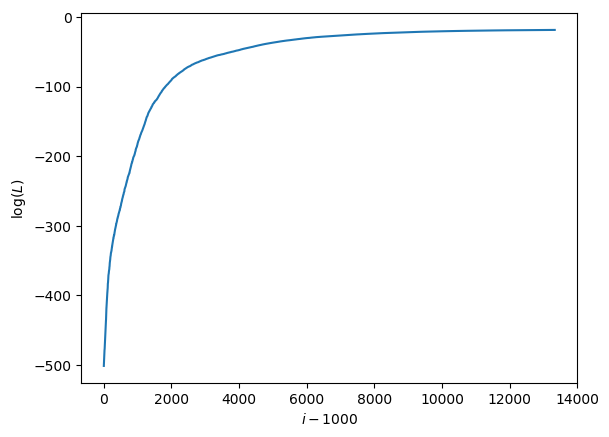

PyObject Text(28,0.5,u'$\\log(L)$')

In [74]:
plot(neststate.deadlogls[1000:end])
xlabel(L"$i - 1000$")
ylabel(L"$\log(L)$")

In [75]:
postsamples32, lnlike32 = EnsembleNest.postsample(neststate)

([-9.96181 -18.7474 … -12.4687 -13.2011; 4.70212 4.73957 … 2.64358 2.8152; … ; -0.802237 3.52336 … 1.55417 1.27893; -6.70557 -2.66204 … -3.47935 -3.88698], [-28.276, -27.3833, -27.2292, -27.202, -27.034, -26.8913, -26.8827, -26.869, -26.7043, -26.6632  …  -17.8793, -18.4523, -18.0192, -18.3956, -18.273, -18.283, -18.0928, -18.4031, -18.4985, -18.4427])

In [76]:
fmax = 1.0/(2*median(diff(xb158i[:,1]))) # As if median dt were Nyquist
df = 1.0/(xb158i[end,1]-xb158i[1,1]) # With spacing equal to 1/T
fs = collect(df:df:fmax)
psds = zeros(size(fs, 1), 1000)
for i in 1:1000
    p = postsamples32[:, rand(1:size(postsamples32,2))] # Choose a random posterior sample
    psds[:,i] = Kalman.psd(posterior, p, fs)
end

In [77]:
pmin = zeros(size(fs, 1))
pmax = zeros(size(fs, 1))
pmed = zeros(size(fs, 1))
for i in 1:size(fs, 1)
    pmin[i] = quantile(vec(psds[i,:]), 0.16)
    pmed[i] = median(vec(psds[i,:]))
    pmax[i] = quantile(vec(psds[i,:]), 0.84)
end

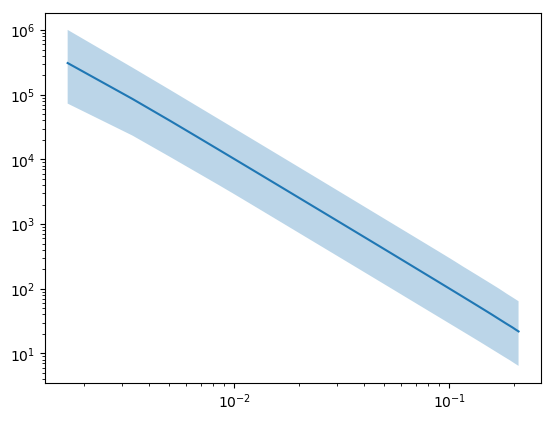

In [78]:
plot(fs, pmed)
fill_between(fs, pmax, pmin, alpha=0.3)
xscale("log")
yscale("log")